# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

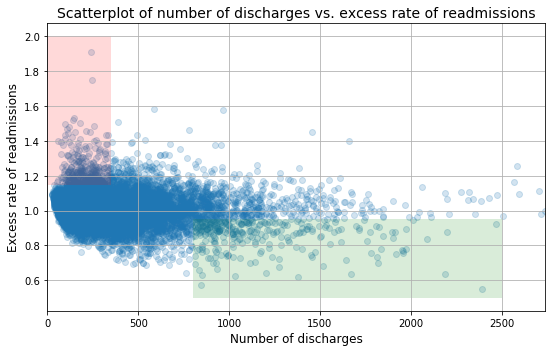

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?
I don't agree with the above analysis or recommendations because: 
- Proper hypothesis test was not conducted to determine the statistical significance of the correlation, which was estimated and not calculated between Excess rate of readmission and different number of discharges or size of the hospital. Hence, the preliminary report was based on insufficient data and only on the basis of the above graph. 
- Nether the correlation coefficient nor the p-values were calculated. 
- Other confounding factors were not ruled out.
- Most importantly the size factor with regard to number of discharges was not clearly defined. It was grouped only into two categories Number of discharges < 100 and number of discharges > 1000. 
- The group of Number of discharges between 100  and 1000 was left out, which is a big number of the hospitals that care about Excess Readmission Rate.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(r"C:\Users\paro\Desktop\EDA\data\cms_hospital_readmissions.csv")

# Conducting EDA

In [6]:
data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [8]:
data.shape

(16860, 12)

In [9]:
data.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [10]:
data.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [11]:
data.isna().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [12]:
data_NOD_NA = data[data['Number of Discharges'] == 'Not Available']

In [13]:
data_NOD_NA.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
62,DOCTORS HOSPITAL AT DEER CREEK LLC,190297,LA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.3287,6.2,4.7,NaN,07/01/2010,06/30/2013
92,PARK RIDGE HEALTH,340023,NC,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2941,5.7,4.4,NaN,07/01/2010,06/30/2013
94,MEADOWS REGIONAL MEDICAL CENTER,110128,GA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2915,6.1,4.7,NaN,07/01/2010,06/30/2013
103,WHEATON FRANCISCAN HEALTHCARE ST FRANCIS,520078,WI,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2844,8.0,6.2,NaN,07/01/2010,06/30/2013
111,CARNEY HOSPITAL,220017,MA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2782,7.3,5.7,NaN,07/01/2010,06/30/2013


In [14]:
# Taking care of missing data and inconvenient portions of data 
clean_data = data[data['Number of Discharges'] != 'Not Available']
clean_data.loc[:, 'Number of Discharges'] = clean_data['Number of Discharges'].astype(int)
clean_data = clean_data.sort_values('Number of Discharges')

In [15]:
clean_data.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


# Conducting correlation analysis and calculating correlation coefficients:

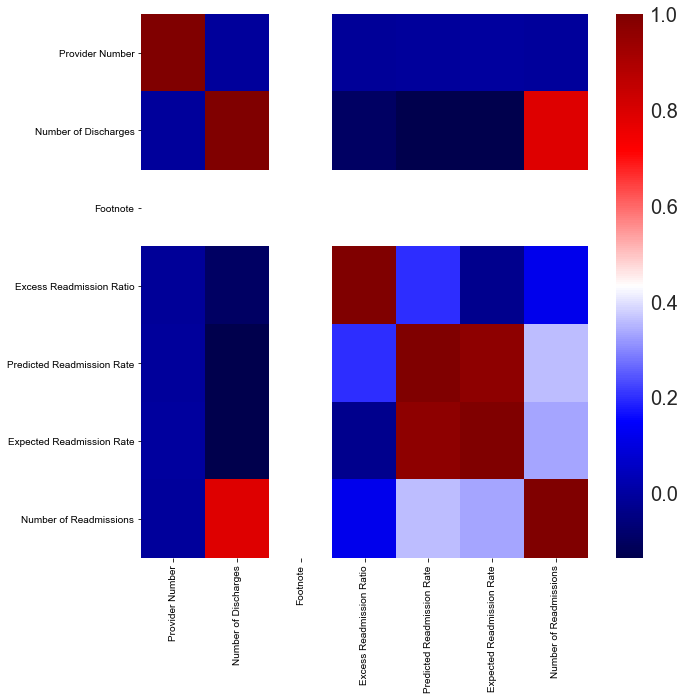

In [16]:
#heatmap to find any high correlations between predictors in the clean_data
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(data=clean_data.corr(), cmap="seismic", ax=ax)
plt.show()

In [17]:
corr = clean_data.corr()
corr = corr[['Excess Readmission Ratio']]
corr

,Excess Readmission Ratio
Provider Number,-0.012112
Number of Discharges,-0.097398
Footnote,NaN
Excess Readmission Ratio,1.000000
Predicted Readmission Rate,0.200039
Expected Readmission Rate,-0.031104
Number of Readmissions,0.117600


# Looking at the two features of interest

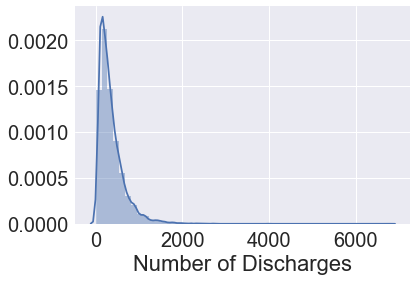

In [18]:
# checking for normality of feature or field number of discharges
ax = sns.distplot(clean_data['Number of Discharges'].dropna())

# Checking for normality of the two features:

In [19]:
def check_significance(p_val, alpha):
    if p_val < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [20]:
def normal_hypoth_test(data, alpha):
    
    # calculate statistic & p-value
    statistic, p_val = normaltest(clean_data['Number of Discharges'])
    print('chi-square statistic:',statistic)
    print('p value =',p_val)
    # check significance
    check_significance(p_val, alpha)
    
    return statistic, p_val

In [21]:
# checking normal test on number of discharges
from scipy.stats import normaltest
stat, p_val = normal_hypoth_test(clean_data['Number of Discharges'], alpha=0.01)

chi-square statistic: 8412.44775274452
p value = 0.0
The null hypothesis can be rejected


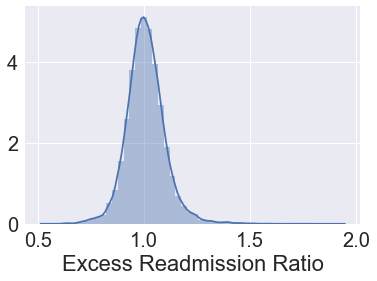

In [22]:
# checking for normality of feature or field Excess Readmission Ratio
ax = sns.distplot(clean_data['Excess Readmission Ratio'].dropna())

In [23]:
# checking normal test on Excess Readmission Ratio
stat, p_val = normal_hypoth_test(clean_data['Excess Readmission Ratio'].dropna(), alpha=0.01)

chi-square statistic: 8412.44775274452
p value = 0.0
The null hypothesis can be rejected


# Checking  statistical significance for  α  = .01 for the correlation between the two features.

In [24]:
# checking pearson correlation coefficient
from scipy import stats
NOD = clean_data[clean_data['Number of Discharges'] > 0]['Number of Discharges']
ERR = clean_data[clean_data['Number of Discharges'] > 0]['Excess Readmission Ratio']
rho, p_val = stats.pearsonr(NOD, ERR)

print('correlation coefficient:',rho)
print('p value =',p_val)
check_significance(p_val, alpha=0.01)

correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25
The null hypothesis can be rejected


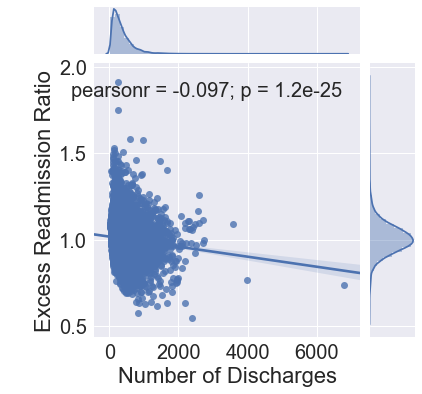

In [25]:
# checking the jointplot
sns.jointplot(NOD, ERR, kind='reg')

## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- Statistical significance indicates that our sample provides sufficient evidence to conclude that the effect exists in the population and is significant, given that the null hypothesis is rejected. 
- Practical significance seeks to answer whether that effect is large enough to practically care about, with regard to the cost- benefit analysis and whether the effect is large enough to be meaningful for the population, also accounting for the confidence interval.
- Recommendation to the cleint would change with regard to collecting data on the costs of readmission and further analysis for the size effect with calculation of Chohen's d.

# Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?
- Advantages: Quick analysis that might be useful for an overview of the relationship between the two features.
- Disadvantages- It does not include calculation of the correlation coefficient or actual correlation between the two factors. Neither does it account for other confounding features that might have an impact.

# Extracting the data for just the two features and conducting hypothesis testing to test significance of correlation:

In [26]:
# dataset with two variables of interest
data_subset = data[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows with missing discharge information:
clean_data_subset = data_subset[data_subset['Number of Discharges'] != 'Not Available']
clean_data_subset['Number of Discharges'] = pd.to_numeric(clean_data_subset['Number of Discharges'])

# Drop nulls:
clean_data_subset.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

clean_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [27]:
# taking into account the size of the hospital for size effect
# Separate observations by the size of hospital:
big = clean_data_subset[clean_data_subset['Number of Discharges'] > 100]
small = clean_data_subset[clean_data_subset['Number of Discharges'] <= 100]

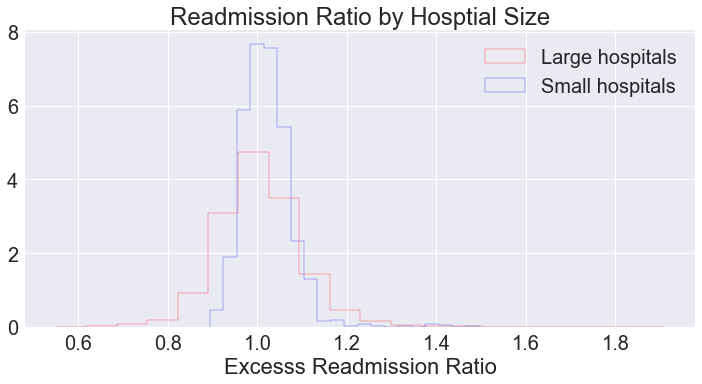

In [28]:
# EDA checking big and small hospitals visually 
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(big['Excess Readmission Ratio'], bins=20, normed=True, histtype='step', stacked=True, color='red')
_ = plt.hist(small['Excess Readmission Ratio'], bins=20, normed=True, histtype='step', stacked=True, color='blue')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio by Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

In [29]:
# checking correlation coefficient between the two variables
corr_coeff = clean_data_subset['Number of Discharges'].corr(clean_data_subset['Excess Readmission Ratio'])
print('Correlation Between Number of Discharges and Excess Readmission Ratio is:',corr_coeff)

Correlation Between Number of Discharges and Excess Readmission Ratio is: -0.0973979435107935


In [30]:
# Null hypothesis: There is no difference between Excess rate of readmissions for big and small hospitals
# Defining the test statistic: 
def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for data:
stats = diff_of_means(big['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

# Draw permutation replicates:
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    both = np.concatenate((big['Excess Readmission Ratio'], small['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_big = both_perm[:len(big)]
    perm_small = both_perm[len(small):]
    perm_replicates[i] = diff_of_means(perm_big, perm_small)

# Compute the p-value:
p_value = np.sum(abs(perm_replicates) >= abs(stats)) / len(perm_replicates)

print('observed difference is:',stats)
print('p-value is:',p_value)

observed difference is: -0.01632073298728165
p-value is: 0.0


In [31]:
clean_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


# Coefficient of Determination:

In [32]:
# checking coefficient of determination
R_squared = corr_coeff**2

In [33]:
print('The coefficient of determination is:',R_squared)

The coefficient of determination is: 0.009486359400131723


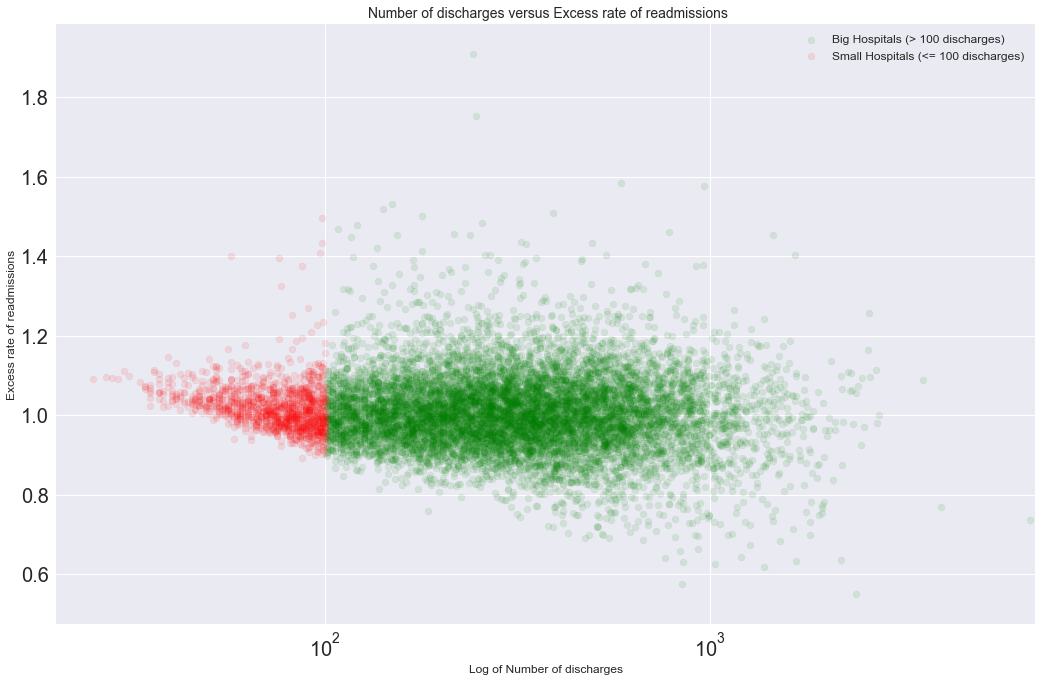

In [34]:
# Another plot that conveys the same information in a more direct manner.
x_big = [a for a in big['Number of Discharges']]
y_big = list(big['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(15,10))
_ = ax.scatter(x_big, y_big, color='green', alpha=0.1)
_ = ax.scatter(x_small, y_small, color='red', alpha=0.1)


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Log of Number of discharges', fontsize=12)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=12)
_ = ax.set_title(' Number of discharges versus Excess rate of readmissions', fontsize=14)
_ = ax.legend(['Big Hospitals (> 100 discharges)', 'Small Hospitals (<= 100 discharges)'], fontsize=12)

ax.grid(True)
fig.tight_layout()